Michael Zaladonis


#1. What is our independent variable? What is our dependent variable?

- The independent variable is the color of the text in relationship to the word. 
- The dependent variable is the amount of time it takes get the correct answers. 

#2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.



>Hypotheses

- H0 : µ1= µ2 - Null-hypothosis is that it will take participantes the same time when selecting congruent images vs incongruent images. 
- HA: µ1 ≠ µ2 - Alternative Hypothosis is that it take more time to process written words for colors which are a different color than the text

>Type of test

- The paired t-test was chosen to as the best test to evaluate whether accept or reject the null hypothoesis. The reasons why a paired t-test is appropriate in this case included the following:
	- There are less than 30 participants.
	- There is one measurement variable and two nominal variables.
	- The test is designed to look for "differences" between means.



[ http://www.biostathandbook.com/pairedttest.html ]( http://www.biostathandbook.com/pairedttest.html )

[ https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-3.php ]( https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-3.php )


#3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [9]:
import pandas as pd
from scipy import stats
from IPython.display import display, Math, Latex

df = pd.read_csv('/Users/michaelzaladonis/PycharmProjects/stroop_data_py/stroopdata.csv')

print df.describe()

x = df['Congruent']
y = df['Incongruent']

df['diff'] = y - x

z = df['diff']

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


#4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

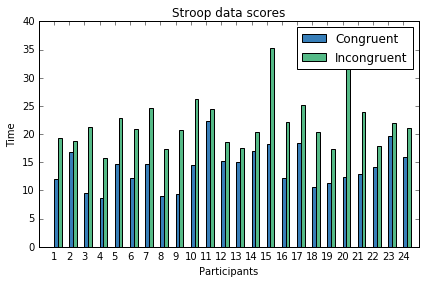

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


X = np.arange(24) + 1
a = plt.bar(X + 0.00, x, color='#377EB8', width=0.25)
b = plt.bar(X + 0.25, y, color='#55BA87', width=0.25)

plt.xlabel('Participants')
plt.ylabel('Time')
plt.title('Stroop data scores')
plt.xticks(X)
plt.legend((a, b), ('Congruent', 'Incongruent'))

plt.tight_layout()
plt.show()

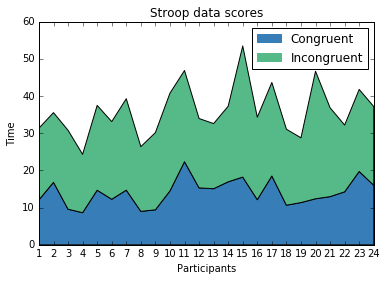

In [11]:
plt.xlabel('Participants')
plt.ylabel('Time')
plt.title('Stroop data scores')
plt.xticks(X)
plt.stackplot(X,x,y, 
          colors=['#377EB8','#55BA87'])

plt.legend([mpatches.Patch(color='#377EB8'),  
            mpatches.Patch(color='#55BA87')], 
           ['Congruent', 'Incongruent'])
plt.show()

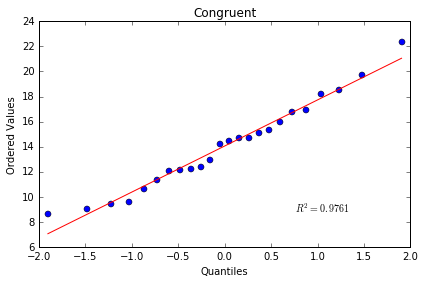

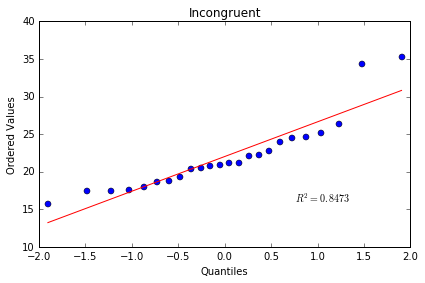

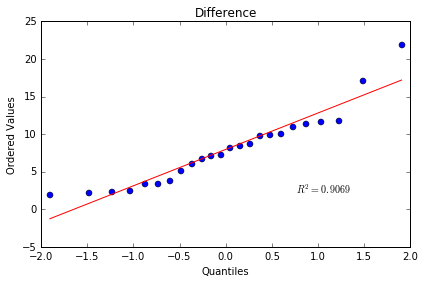

In [13]:
# Congruent
stats.probplot(x, plot=plt)
plt.title("Congruent")
plt.tight_layout()
plt.show()
# Incongruent
stats.probplot(y,plot=plt)
plt.title("Incongruent")
plt.tight_layout()
plt.show()
# Time difference
stats.probplot(z, plot=plt)
plt.title("Difference")
plt.tight_layout()
plt.show()

#5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

>What is your confidence level and your critical statistic value?

- Confidence level is 95% or 0.95. 
- Critical Statistic Value: 0.05

In [14]:
ttest = stats.ttest_rel(x,y)

alpha = 0.05

print 'P-value:  %.8f ' % ttest[1]

###
print "\nThe P values is less than the alpha value of 0.05?  ", alpha > ttest[1]

print '\nOne sided P-value:  %.8f   ' % (ttest[1] / 2)

print '\nTest statistic:   ', np.absolute(ttest[0])

print '\nT-critical value at alpha of 0.05  :   ', stats.t.ppf(1 - 0.05, 23)

P-value:  0.00000004 

The P values is less than the alpha value of 0.05?   True

One sided P-value:  0.00000002   

Test statistic:    8.02070694411

T-critical value at alpha of 0.05  :    1.71387152775


>Do you reject the null hypothesis or fail to reject it? 

The null hypothesis is rejected.  The results of this examination provide significant evidence to reject the null hypothesis, as the P value of 0.00000004 is less than the $\alpha$ value of 0.05, and the  t-statistic of 8.02070694411 is greater than the t-critical value of 1.71387152775.


>Come to a conclusion regarding the experiment task. 

We can conclude with relative certainty that there is a significant difference in the amount of time taken to identify congruent and incongruent words.

>Did the results match up with your expectations?

After completing the Stroop test online, it became readily apparent that it took much longer for my brain to process which color should be selected.  After, going through it a few times I was able to get faster at completing the task, but there still was a delay between the two. 

[ http://www.statsdirect.com/help/default.htm#basics/p_values.htm ]( http://www.statsdirect.com/help/default.htm#basics/p_values.htm )

[ Critical Values of the Student's t Distribution ]( http://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm )
